## Opening and interacting with Jupyter
We will explore the Jupyter notebook. 
Lets begin by understanding command mode.

Lets navigate to an empty cell (thats what these boxes are called). Now hit `esc`. What happens? The cell border turns blue. We are now in __command__ mode, where we can execute commands. Now hit `Enter` or `Return`. What happens? The border turns green. We are now in __edit__ mode. Notice the pencil in the upper right hand part of the screen. This is another clue.

 Let's enter __command__ mode again. Press `h` to pull up the help menu. This will display common operations and their corresponding shortcuts. Lets try some simple commands to create new cells and navigate. To create a cell below your existing cell enter __command__ mode and press `b`. An easy mnemonic to remember this is b=below. To create a cell above, its `a`.

Now let's try navigating. Make sure we are still in __command__ mode. Press `j` to move down a cell. Press `k` to move back up. No good mnemonic here, but users of the VI or VIM editors may be familiar. 

Finally let's try deleting a cell. Create a new cell anywhere (above or below). Navigate to that cell. Now delete it by ensuring you are in __command__ mode and typing `dd`. 

Now we're moving! Lets try adding some content to one of our cells. A good thing about Jupyter is you don't just add code, you can add notes too! Lets try that now, see if you can replicate the following:

## Hello World
This is my first Jupyter markdown

Now let's try to run some Python code! Don't worry if you don't understand the meaning of what you are doing, that will become clear soon! Lets create a new cell under the Hello World markdown cell. Now lets toggle the __Code__ cell type by entering __command__ mode and hitting `y`. 

In [1]:
print('Hello World!')

Hello World!


Now you know everything to start programming in Python ... lets get started!

## Introducing Pandas
The name is derived from the term "panel data", an econometrics term for data sets that include observations over multiple time periods for the same individuals.

## Data Visualization in Python
And now the reason we are all here...plotting!

In [2]:
# Import matlplotlib plotting library
import matplotlib.pyplot as plt

In [3]:
time = [0, 1, 2, 3]
position = [0, 100, 200, 300]

Text(0, 0.5, 'Position (km)')

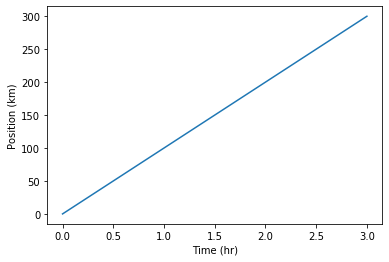

In [4]:
plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')

Text(0.5, 0, 'Year')

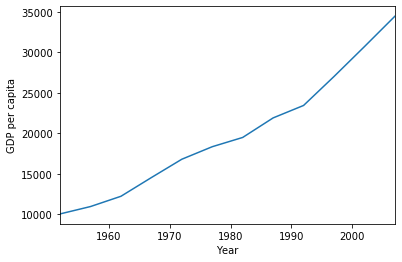

In [5]:
import pandas as pd
data = pd.read_csv('data/gapminder_gdp_oceania.csv', index_col='country')

#Extract the year from the last 4 characters of each column name
years = data.columns.str.strip('gdpPercap_')
# Now convert the strings to ints
integer_years = years.astype(int)
data.columns = integer_years
data.loc['Australia'].plot()
plt.ylabel('GDP per capita')
plt.xlabel('Year')

Now by default DataFrame.plot will plot the rows as the x axis

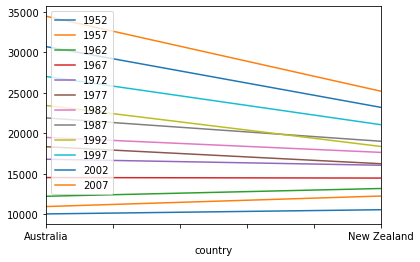

In [6]:
data.plot()

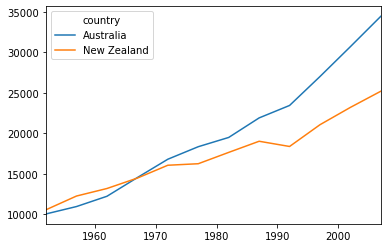

In [7]:
data.T.plot()

In [8]:
data

,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


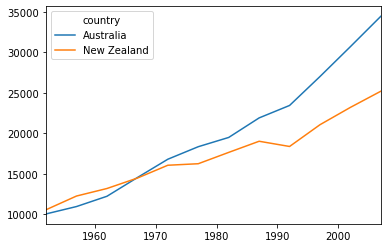

In [9]:
data.T.plot()

In [10]:
data = pd.read_csv('data/gapminder_gdp_europe.csv', index_col='country')
years = data.columns.str.strip('gdpPercap_')
integer_years = years.astype(int)
data.columns = integer_years

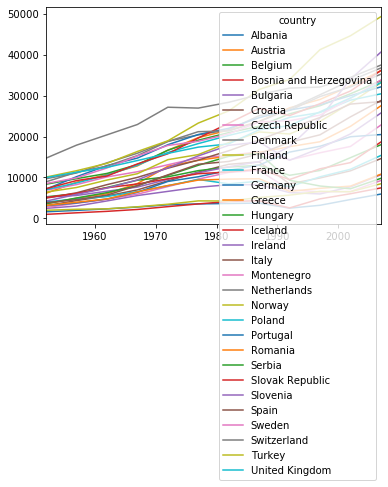

In [12]:
data.T.plot()

Thats hard to read! Can we make it bigger?

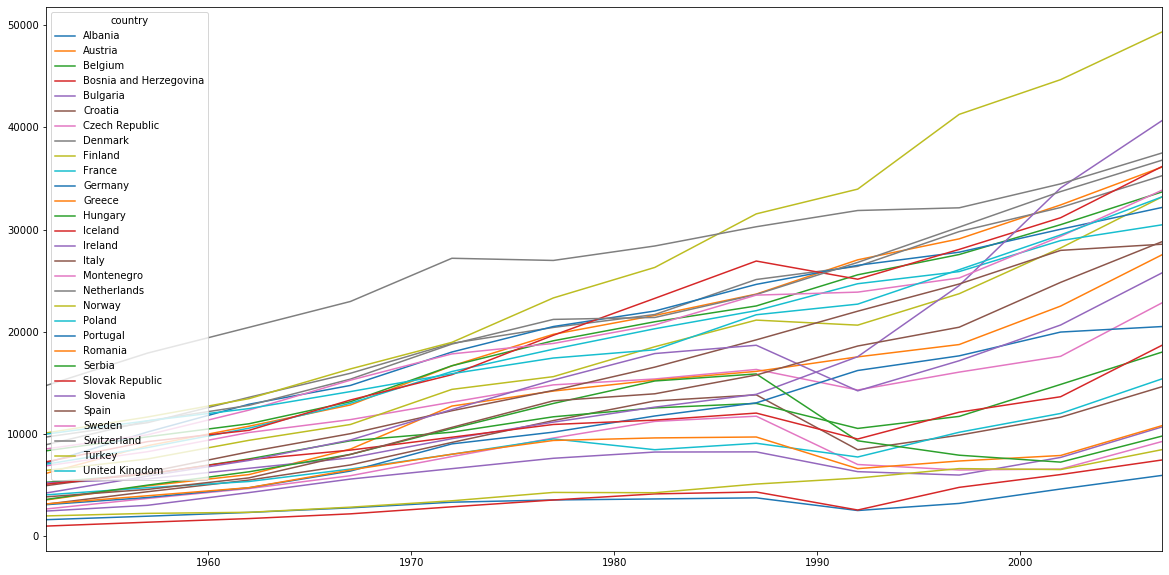

In [15]:
plt.rcParams["figure.figsize"] = (20,10)
data.T.plot()

Well that helped, but that still seems overwhelming! Lets just look at a part of the data. First we are going to need to manipulate the data first to get it into the right format to work with.

In [17]:
data
melted = pd.melt(data.reset_index(), id_vars='country', var_name="Date", value_name="GDP")
melted

,country,Date,GDP
0,Albania,1952,1601.056136
1,Austria,1952,6137.076492
2,Belgium,1952,8343.105127
3,Bosnia and Herzegovina,1952,973.533195
4,Bulgaria,1952,2444.286648
...,...,...,...
355,Spain,2007,28821.063700
356,Sweden,2007,33859.748350
357,Switzerland,2007,37506.419070
358,Turkey,2007,8458.276384


Lets try just looking at one date at a time.

## Maybe its time for a library!
Let's try the Seaborn library.

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Now if we want to plot this more complex data easily we will need to manipulate it some, or "melt" it.

In [22]:
melted_2007 = melted[melted['Date']==2007]
melted_2007

,country,Date,GDP
330,Albania,2007,5937.029526
331,Austria,2007,36126.492700
332,Belgium,2007,33692.605080
333,Bosnia and Herzegovina,2007,7446.298803
334,Bulgaria,2007,10680.792820
335,Croatia,2007,14619.222720
336,Czech Republic,2007,22833.308510
337,Denmark,2007,35278.418740
338,Finland,2007,33207.084400
339,France,2007,30470.016700


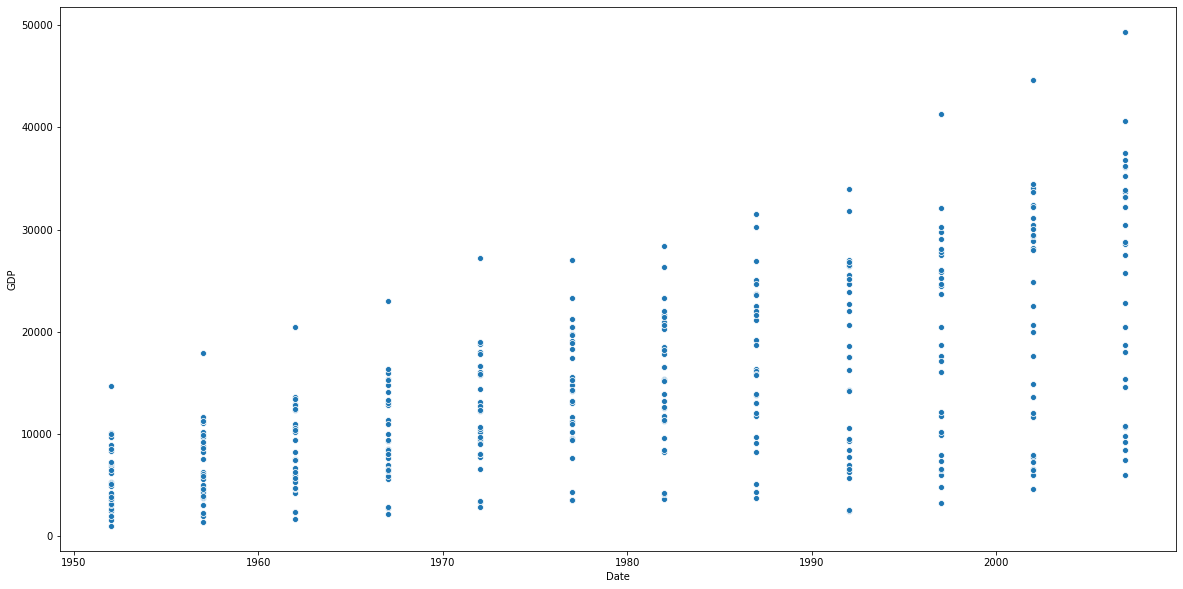

In [23]:
import seaborn as sns
sns.scatterplot(x='Date', y='GDP',  data=melted)


Well that certainly looks cleaner! But where did our countries go?

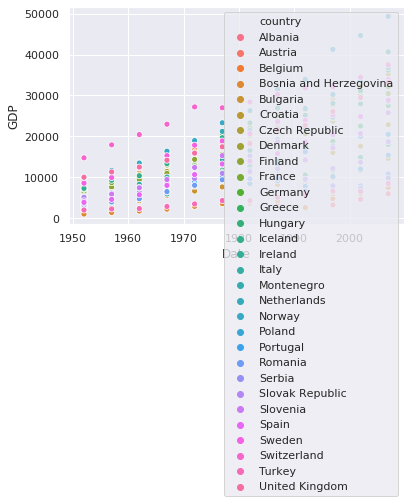

In [332]:
sns.scatterplot(x='Date', y='GDP', hue='country',data=melted

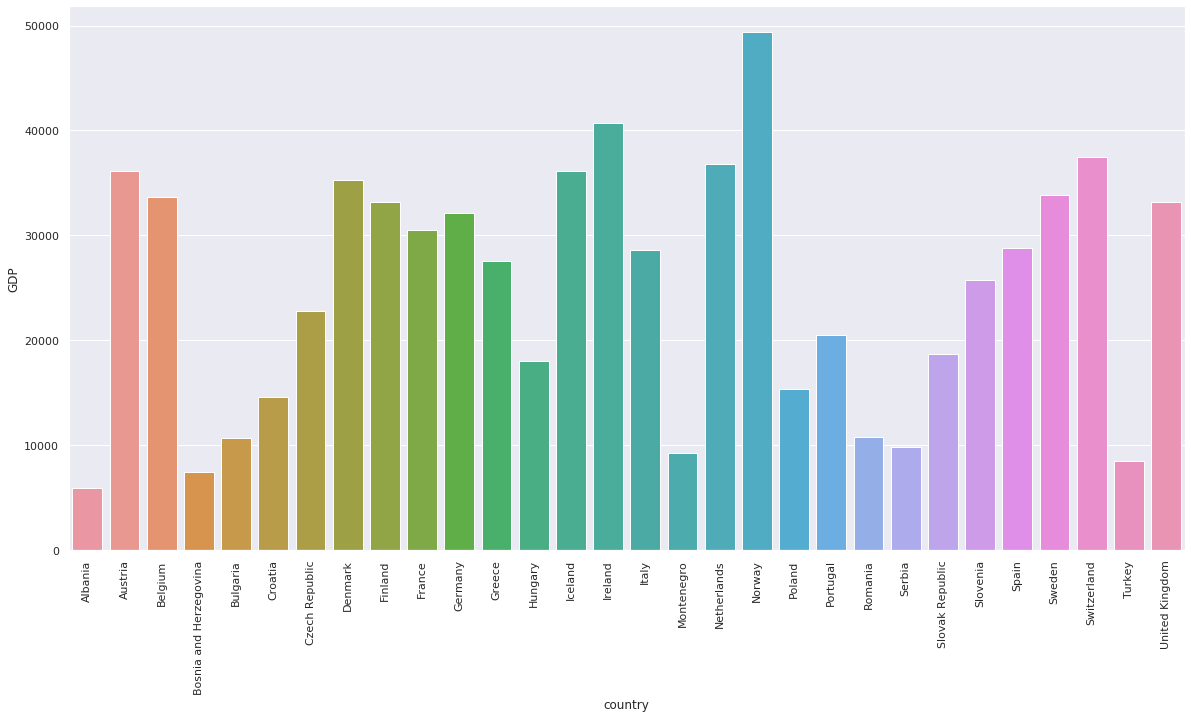

In [370]:
gg#sns.relplot(x="Date", y="GDP",
           # col="country", data=melted);
#melted[melted['Date']==2007]
melted_2007 = melted[melted['Date']==2007]
plt.xticks(rotation=90)
#plt.rcParams["figure.figsize"] = (20,10)
g = sns.barplot(x="country", y="GDP", data=melted_2007);


In [361]:
g.xticks(rotation=45)

AttributeError: 'AxesSubplot' object has no attribute 'xticks'

In [ ]:
df = px.data.gapminder()
# link to gapminder data
data_url = 'http://bit.ly/2cLzoxH'
# read data from url as pandas dataframe
gapminder = pd.read_csv(data_url)
gapminder

In [ ]:
import seaborn as sns
#ax = sns.lineplot(x=1957, y=2007, data=data, hue=country)
data = pd.read_csv('data/gapminder_gdp_oceania.csv')
ax = sns.lineplot(x='gdpPercap_1952', y='gdpPercap_1957', hue='country', data=data )

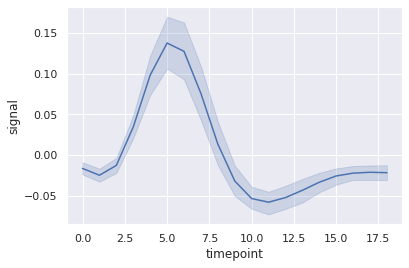

In [90]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
fmri = sns.load_dataset("fmri") ax = sns.lineplot(x="timepoint", y="signal", hue="event",
...                   data=fmri)
ax = sns.lineplot(x="timepoint", y="signal", data=fmri)

## Lets look at some more complex data now ...

In [326]:
import plotly.express as px
# Gapminder dataset URL
data_url = 'http://bit.ly/2cLzoxH'
# read data from url as pandas dataframe
gapminder = pd.read_csv(data_url)
print(gapminder)

          country  year         pop continent  lifeExp   gdpPercap
0     Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1     Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2     Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3     Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4     Afghanistan  1972  13079460.0      Asia   36.088  739.981106
...           ...   ...         ...       ...      ...         ...
1699     Zimbabwe  1987   9216418.0    Africa   62.351  706.157306
1700     Zimbabwe  1992  10704340.0    Africa   60.377  693.420786
1701     Zimbabwe  1997  11404948.0    Africa   46.809  792.449960
1702     Zimbabwe  2002  11926563.0    Africa   39.989  672.038623
1703     Zimbabwe  2007  12311143.0    Africa   43.487  469.709298

[1704 rows x 6 columns]


In [327]:
fig = px.scatter(gapminder.query("year==2007"), x="gdpPercap", y="lifeExp", size="pop", color="continent",
           hover_name="country", log_x=True, size_max=60)
fig.show()